In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 유방암 데이터 로드
cancer_data = load_breast_cancer()
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.Series(cancer_data.target)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train_scaled, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test_scaled)

# 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'랜덤 포레스트 모델의 MSE: {mse_rf}')

랜덤 포레스트 모델의 MSE: 0.03276140350877193


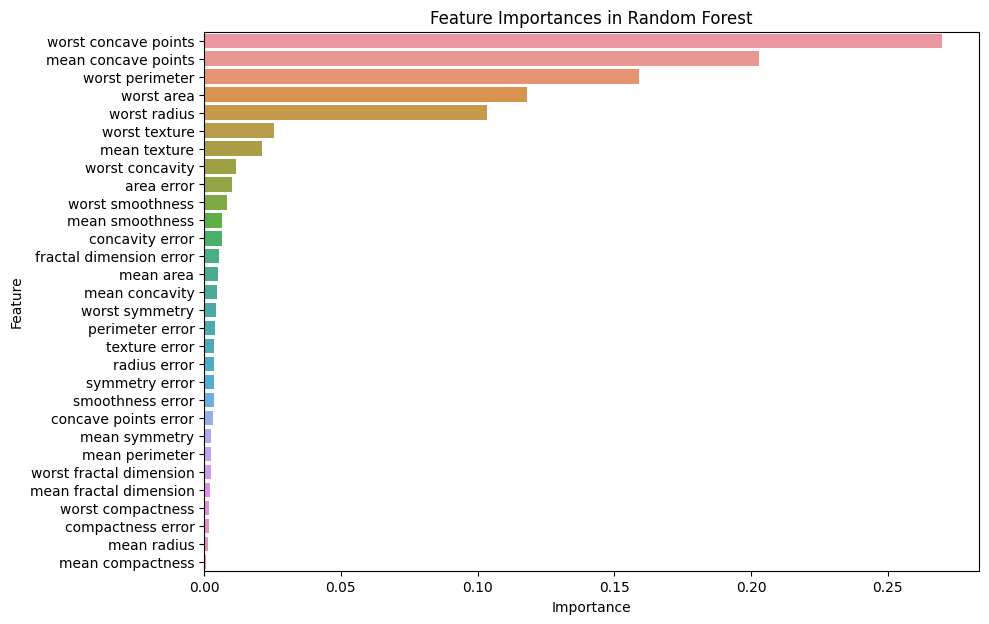

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도 추출
feature_importances = rf_model.feature_importances_

# 특성 중요도를 데이터프레임으로 변환
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# 중요도 순으로 정렬
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances in Random Forest')
plt.show()